In [1]:
import os
import wave
import numpy as np
import speech_recognition as sr
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.playback import play
from pydub.effects import normalize
import spacy

D:\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
D:\Anaconda3\lib\site-packages\pydub\utils.py:179: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


## import data

In [2]:
DATA_FOLDER = "voice_data"
CURRENT_DIR = os.getcwd()
DATA_PATH = os.path.join(CURRENT_DIR, DATA_FOLDER)

In [3]:
def fetch_voice_data(url=DATA_PATH): 
    audios = []
    for audio in os.listdir(DATA_PATH):
        if audio.endswith('.wav'):
            audios.append(audio)
    return audios

audios = fetch_voice_data()
print(len(audios))

5


## use wave object to get sample rate, time for plot

In [39]:
def get_frames_time(file_path):
    wav_file = wave.open(file_path, 'r')
    samples_bin = wav_file.readframes(-1)
    samples_num = np.frombuffer(samples_bin, dtype='int16')
    print(len(samples_num))
    framerate = wav_file.getframerate()
    time = np.linspace(start=0, stop=len(samples_num)/framerate, num=len(samples_num))
    return time, samples_num

In [47]:
def get_audio_params(file_path):
    wav_file = wave.open(file_path, 'r')
    print(f"channels: {wav_file.getnchannels()}")
    print(f"sample rate: {wav_file.getframerate()}")
    print(f"frames: {wav_file.getnframes()}")
    print(f"sample width: {wav_file.getsampwidth()}")
    print(f"params: {wav_file.getparams()}")

get_audio_params("voice_data/good-afternoon.wav")

channels: 2
sample rate: 48000
frames: 166144
sample width: 2
params: _wave_params(nchannels=2, sampwidth=2, framerate=48000, nframes=166144, comptype='NONE', compname='not compressed')


In [45]:
time_m, soundwave_m = get_frames_time("voice_data/good-morning.wav")
time_a, soundwave_a = get_frames_time("voice_data/good-afternoon.wav")
time_l, soundwave_l = get_frames_time("voice_data/good-morning-lei.wav")

249984
332288
205078


D:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


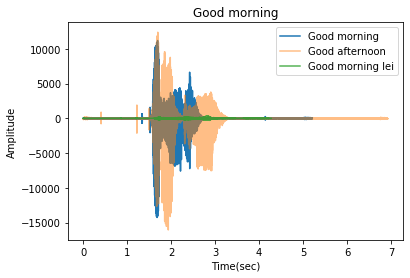

In [6]:
plt.title('Good morning')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')

plt.plot(time_m, soundwave_m, label='Good morning')
plt.plot(time_a, soundwave_a, label='Good afternoon', alpha=0.5)
plt.plot(time_l, soundwave_l, label='Good morning lei', alpha=0.8)

plt.legend()
plt.show()

In [7]:
##  make it able to accept arrays 
def plot_wav_raw(title, time, soundwave, label):
    plt.title(title)
    plt.xlabel('Time(sec)')
    plt.ylabel('Amplitude')

    plt.plot(time, soundwave, label=label)

    plt.legend()
    plt.show()

D:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


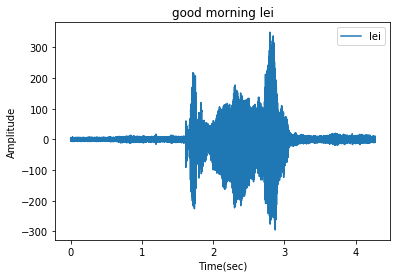

In [8]:
plot_wav_raw("good morning lei", time_l, soundwave_l, "lei")  

## using pydub to edit audio file

In [9]:
wav_file = AudioSegment.from_file("voice_data/loud_quiet.wav")

In [10]:
## operators for addition and substraction
quiet = wav_file - 20
loud = wav_file + 20

In [11]:
## if an audio's volume distribution varies too much
## normalization will find the max volume in the audio 
## and adjust the rest according to that
normalized = normalize(loud)

In [12]:
play(normalized)

In [13]:
wav_file_1 = AudioSegment.from_file("voice_data/good-morning.wav")

In [14]:
wav_file_seg = wav_file_1[1000:] 

In [ ]:
##### combi = wav_file_seg + norm
combi.export(out_f="combi.wav", format="wav")

In [16]:
channels = wav_file.split_to_mono()

In [49]:
def display_audio_stats(filename):
  # Create AudioSegment instance
  audio_segment = AudioSegment.from_file(filename)
  
  print(f"Channels: {audio_segment.channels}")
  print(f"Sample width: {audio_segment.sample_width}")
  print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
  print(f"Frame width: {audio_segment.frame_width}")
  print(f"Length (ms): {len(audio_segment)}")
  return audio_segment

In [50]:
audio = display_audio_stats("Ah.wav")

Channels: 2
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 4
Length (ms): 1562


In [51]:
def transcribe_audio(filename):
  # Setup a recognizer instance
  recognizer = sr.Recognizer()
  
  # Import the audio file and convert to audio data
  audio_file = sr.AudioFile(filename)
  with audio_file as source:
    audio_data = recognizer.record(source)
  
  # Return the transcribed text
  return recognizer.recognize_google(audio_data)

In [52]:
transcribe_audio("combi.wav")

'morning cloud quiet'

## sentiment analysis

In [21]:
nlp = spacy.load("en_core_web_sm")

In [22]:
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

In [23]:
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'can', 'tell', 'would', 'shake', 'turn', 'talk', 'say']
Sebastian NORP
Google ORG
2007 DATE
American NORP
Recode ORG
earlier this week DATE
